Ovde imamo informacije o ceni Bitkoina u prethodnih godinu dana
# Linearna regresija nad ovim cenama

In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import lognorm, norm
import scipy
from sklearn.linear_model import LinearRegression
import datetime as dt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

coincapBitcoinPath = "/FileStore/real-data/coincap2.csv"

jsonSchema = StructType([
    StructField("priceUsd", StringType(), True),
    StructField("time", LongType(), True),
    StructField("date", StringType(), True)
])
bitcoin_coincap_df = spark.read.schema(jsonSchema).json(coincapBitcoinPath)
display(bitcoin_coincap_df)

priceUsd,time,date
22985.8084693994132959,1674518400000,2023-01-24T00:00:00.000Z
23088.5098671765254327,1674691200000,2023-01-26T00:00:00.000Z
23017.3320728634933905,1674777600000,2023-01-27T00:00:00.000Z
23828.2216365205844973,1675296000000,2023-02-02T00:00:00.000Z
22551.4951913173097458,1675900800000,2023-02-09T00:00:00.000Z
24039.3029946541346101,1677024000000,2023-02-22T00:00:00.000Z
23071.2316343487363312,1677283200000,2023-02-25T00:00:00.000Z
23601.3632399048713792,1677628800000,2023-03-01T00:00:00.000Z
22467.7826318359252603,1677974400000,2023-03-05T00:00:00.000Z
22432.5623115674822113,1678060800000,2023-03-06T00:00:00.000Z


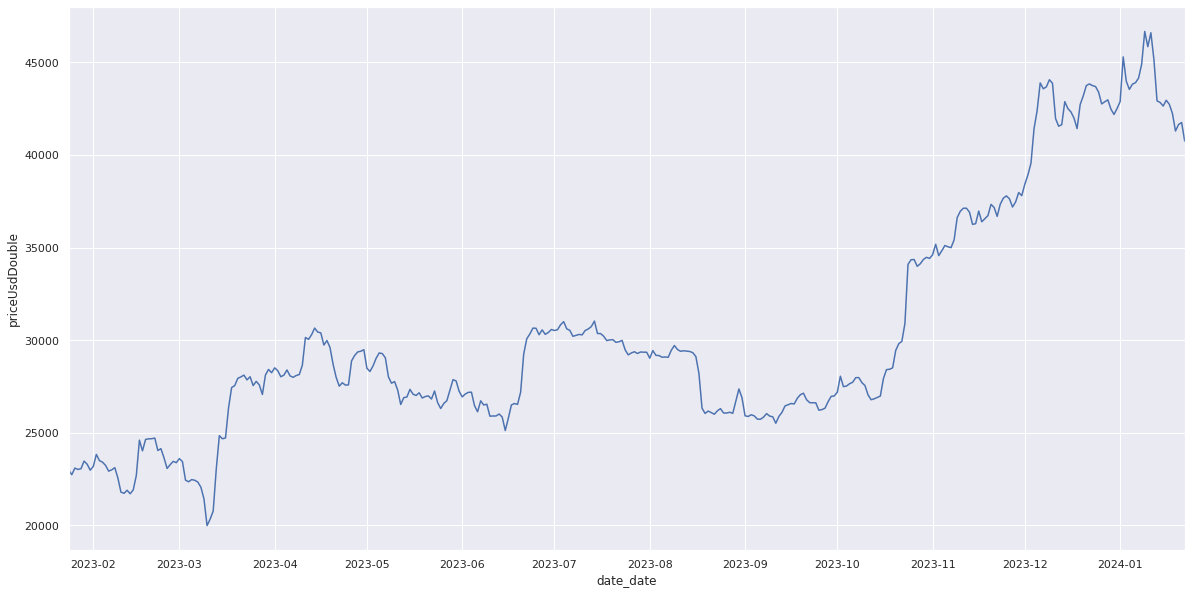

In [0]:
bitcoin_coincap_df = bitcoin_coincap_df.dropDuplicates()

bitcoin_coincap_df = bitcoin_coincap_df.withColumn("priceUsdDouble", col("priceUsd").cast("double"))
bitcoin_coincap_df = bitcoin_coincap_df.withColumn("date_date", col("date").cast("date"))

# display(bitcoin_coincap_df)
bitcoin_coincap_df_pd = bitcoin_coincap_df.toPandas()

sns.set()
# bitcoin_coincap_df_pd['priceUsdDouble'].min()
# plt.scatter(bitcoin_coincap_df_pd['date_date'], bitcoin_coincap_df_pd['priceUsdDouble'], label='Price By Date')
plt.figure(figsize=(20, 10))

plt.xlim(bitcoin_coincap_df_pd['date_date'].min(), bitcoin_coincap_df_pd['date_date'].max())
# plt.ylim(bitcoin_coincap_df_pd['priceUsdDouble'].min(), bitcoin_coincap_df_pd['priceUsdDouble'].max())
sns.lineplot(data = bitcoin_coincap_df_pd, x="date_date", y = "priceUsdDouble")

plt.show()

SMoothing of time series --> finding time trends

https://mins.space/blog/2020-06-29-moving-average-effect-window-size/

https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp#:~:text=As%20a%20general%20guideline%2C%20if,another%20MA%20indicates%20a%20downtrend.
## Uzecemo za moving window prvo da je vrednost 30 (mada moze i vise ? )

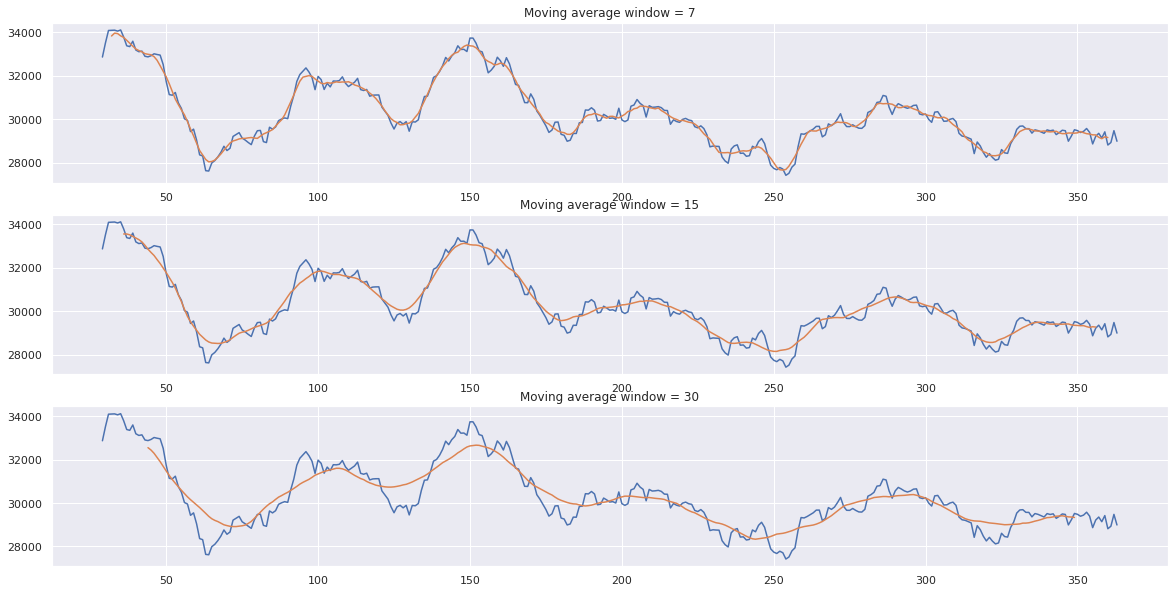

In [0]:
window_size = 30
# SMA == Simple Moving Average
SMA = bitcoin_coincap_df_pd['priceUsdDouble'].rolling(window=window_size).mean()
# CMA = bitcoin_coincap_df_pd['priceUsdDouble'].expanding().mean()

# display(bitcoin_coincap_df_pd['SMA'])
# bitcoin_coincap_df_pd = bitcoin_coincap_df_pd.dropna(subset=['SMA'])

fig, axes = plt.subplots(3, 1, figsize=(20,10))

SMA.plot(ax=axes[0], title='Moving average window = 7')
SMA.rolling(7, center=True).mean().plot(ax=axes[0])

SMA.plot(ax=axes[1], title='Moving average window = 15')
SMA.rolling(15, center=True).mean().plot(ax=axes[1])

SMA.plot(ax=axes[2], title='Moving average window = 30')
SMA.rolling(30, center=True).mean().plot(ax=axes[2])

# bitcoin_coincap_df_pd['SMA'].plot(ax=axes[3], title='Moving average window = 3')
# bitcoin_coincap_df_pd['SMA'].rolling(3, center=True).mean().plot(ax=axes[3])

# bitcoin_coincap_df_pd['SMA'].plot(ax=axes[4], title='Moving average window = 1')
# bitcoin_coincap_df_pd['SMA'].rolling(1, center=True).mean().plot(ax=axes[4])
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
# axes[3].set_xlabel('')
# axes[4].set_xlabel('')
plt.show()

# Pomocu ovih  grafova mozemo da vidimo koji otprilike moving average window treba da uzmemo
# Window 1 i 3 previse prate liniju, nisu dovoljno SMOOTH, ali npr 7 i 5 su okej mada bismo mogli jos vise da izravnamo
# Dok realno bismo mogli da uzmemo i vrednos 15 ali s obzirom da je veliki broj -> znaci da necemo imati procenjene vrednosti za prvih 7 i poslednjih 7 tacaka
# Mozemo i videti na grafovima da je narandzasta linija dosta kraca

# Kada je SMA (narandzasta linija) iznad naseg grafika TADA ce i cena da ide na gore, i obrnuto, ako je ispod grafika tada cena (tj "trend") ide dole.
# OVO NIJE PREDIKTIVNO ovo je samo analiza istorijskih podataka, i na osnovu ovoga moze donekle da se napravi predikcija, ali je to mnogo cesce RANDOM nego zapravo
# prediktivno, ali jeste zanimljivo jer pomocu te linije se mnogo lakse UOCE trendovi koji su bili.

## LINEARNA REGRESIJA GDE JE Y -> CENA, A X -> DATUM

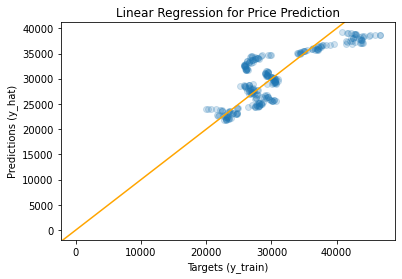

Slope (Coefficient): 5031.994648564392
Intercept: 30511.48459973183


In [0]:
bitcoin_coincap_df_pd['date'] = pd.to_datetime(bitcoin_coincap_df_pd['date'])
bitcoin_coincap_df_pd

# bitcoin_coincap_df_pd['datetime']= bitcoin_coincap_df_pd['datetime'].map(dt.datetime.toordinal)
# bitcoin_coincap_df_pd

# Convert lists to NumPy arrays
x = bitcoin_coincap_df_pd['time']
x = x.values.reshape(-1, 1)
y = bitcoin_coincap_df_pd['priceUsdDouble']
# X = sm.add_constant(X)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=165) #Random state je seed

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x_train, y_train)
model.score(x_train, y_train)

# Make predictions
predictions = model.predict(x_train)

# Plot the data and the regression line
plt.title('Linear Regression for Price Prediction')
plt.scatter(y_train, predictions, alpha=0.2, label='Actual Prices')
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.axline([0, 0], [1, 1], c='orange')
plt.show() 

# Print the slope (coefficient) and intercept of the regression line
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
# Po ovom plotu pretpostavljam da ce lose predikcije biti

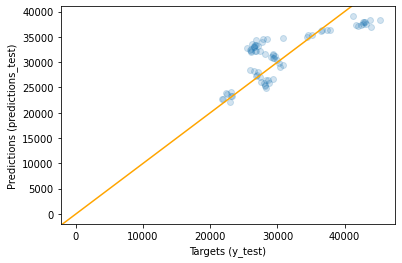

In [0]:
predictions_test = model.predict(x_test)

plt.scatter(y_test,predictions_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (predictions_test)')
plt.axline([0, 0], [1, 1], c='orange')
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

# Lose, losi podaci za regresiju da pomocu datuma utvrdimo nesto, 
# Ne moze da se prati linija! 

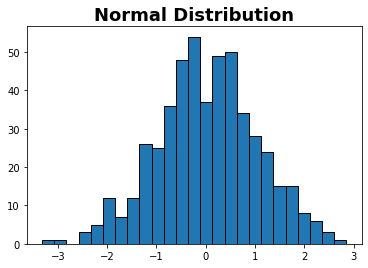

In [0]:
normal_data = norm(loc=0, scale=1).rvs(size=500)
plt.hist(normal_data, edgecolor='black', bins=25)
plt.title('Normal Distribution', weight='bold', size=18)
plt.show()

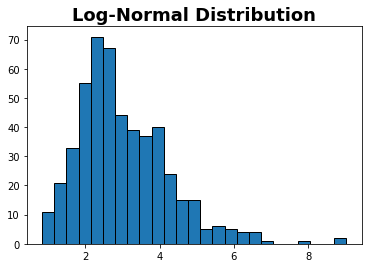

In [0]:
lognorm_data = lognorm.rvs(s=0.4, scale=math.exp(1), size=500)
plt.hist(lognorm_data, edgecolor='black', bins=25)
plt.title('Log-Normal Distribution', weight='bold', size=18)
plt.show()

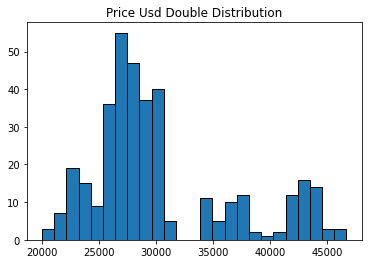

In [0]:
plt.hist(bitcoin_coincap_df_pd["priceUsdDouble"], edgecolor="black", bins=25)
plt.title('Price Usd Double Distribution')
plt.show()

# Meni po ovim histogramima bas i ne deluje da je Price USd normalne distribucije,
# Ali lici na log, tako da sad cemo da vidimo u kojoj meri su zapravo slicni

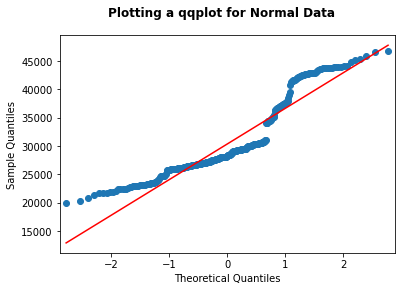

In [0]:
fig = sm.qqplot(bitcoin_coincap_df_pd["priceUsdDouble"], line='s') # “r” - A regression line is fit
fig.suptitle('Plotting a qqplot for Normal Data', weight='bold')
plt.show()

# Mozemo reci da i ne prati toliko liniju --> tako da nije normalne raspodele

In [0]:
from scipy.stats import anderson

# Fit a log-normal distribution to the data
# lognorm_params = lognorm.fit(lognorm_data)

# # Generate Q-Q plot
# sm.qqplot(np.array(bitcoin_coincap_df_pd["priceUsdDouble"]), dist=lognorm, distargs=lognorm_params, line='s', fit=True)
# plt.title('Q-Q Plot Comparing Data to Log-Normal Distribution')
# plt.show()

anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(bitcoin_coincap_df_pd["priceUsdDouble"], dist='logistic')
print(f'Anderson-Darling test statistic: {anderson_stat}')
print(f'Critical values: {anderson_critical_values}')
print(f'Significance levels: {anderson_significance_levels}')

# U vecini slucajeva je vrednost test statisstic veca od significance level na odredjenoj critical vrednosti:
# To znaci da ove vrednosti ne pripadaju NI LogNormal distribuciji


Anderson-Darling test statistic: 15.587651059598329
Critical values: [0.426 0.563 0.66  0.768 0.905 1.009]
Significance levels: [25.  10.   5.   2.5  1.   0.5]


In [0]:
anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(bitcoin_coincap_df_pd["priceUsdDouble"], dist='expon')
print(f'Anderson-Darling test statistic: {anderson_stat}')
print(f'Critical values: {anderson_critical_values}')
print(f'Significance levels: {anderson_significance_levels}')

#Nije ni eksponencijalna

Anderson-Darling test statistic: 111.45445296140116
Critical values: [0.92  1.076 1.339 1.603 1.954]
Significance levels: [15.  10.   5.   2.5  1. ]


Morali bismo da izmenimo dataset i da ga unormalimo, ako bismo zeleli da ga koristimo dalje za neku predikciju

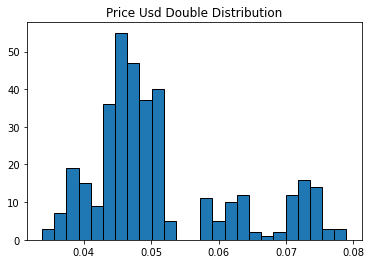

In [0]:

prices = bitcoin_coincap_df_pd["priceUsdDouble"]

normalized_arr = preprocessing.normalize([prices]).reshape(364, )
# print(normalized_arr)
# normal_data = norm(loc=0, scale=1).rvs(size=500)
plt.hist(normalized_arr, edgecolor="black", bins=25)
plt.title('Price Usd Double Distribution')
plt.show()